In [1]:
import sklearn
import pandas as pd
import numpy as np

In [59]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://homl.info/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic:
            titanic.extractall(path="datasets")
    return pd.read_csv(Path("datasets/titanic/train.csv")), pd.read_csv(Path("datasets/titanic/test.csv"))

train, test = load_housing_data()

In [79]:
X_train = train.copy()
X_train = X_train.drop('Survived', axis=1)
X_train.set_index('PassengerId', inplace=True)
X_test = test.copy()
X_test.set_index('PassengerId', inplace=True)

In [80]:
# fill average ages for nan value
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
# drop the column Cabin
X_train.drop('Cabin', axis=1, inplace=True)
# drop the row with the empty value in the column Embarked
X_train.dropna(subset='Embarked', axis=0, inplace=True)
# drop the row where Fare is equal to 0
# X_train = X_train[X_train['Fare']!=0]

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

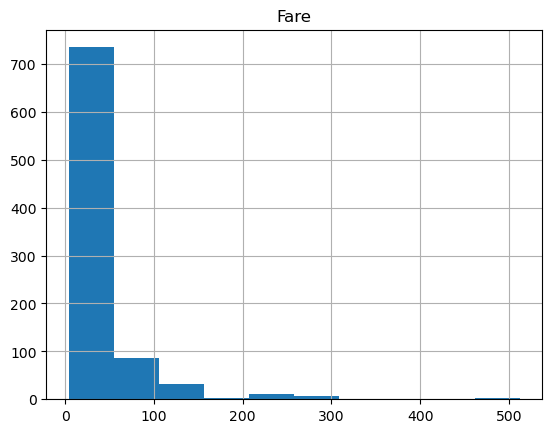

In [39]:
X_train[['Fare']].hist()

In [81]:
# before scaling numeric features, log them first
# only Fare's distribution is heavily long tailed

from sklearn.preprocessing import FunctionTransformer
log_cols = ['Fare']
X_train[log_cols] = X_train[log_cols] + 1 # plus one to avoid zero divided error
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(X_train[log_cols])
X_train[log_cols] = log_pop

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

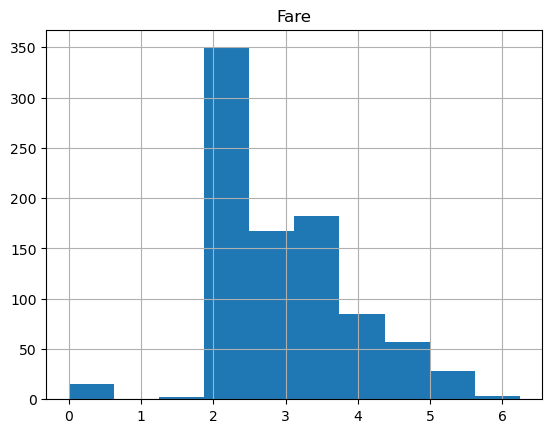

In [82]:
# Fare distribution after log
X_train[log_cols].hist()

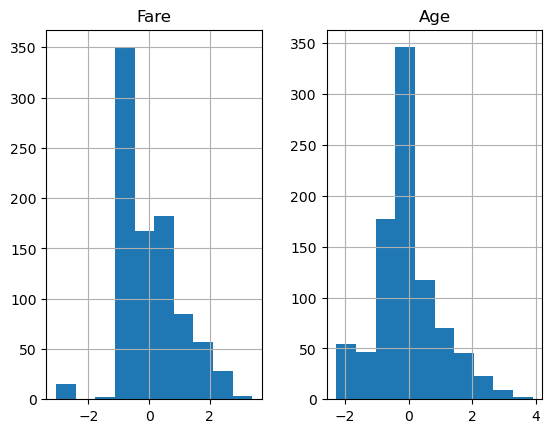

In [83]:
# Scale features

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_cols = ['Fare', 'Age']
std_fare = std_scaler.fit_transform(X_train[std_cols])
pd.DataFrame(std_fare, columns=std_cols).hist(bins=10)
X_train[std_cols] = pd.DataFrame(std_fare, columns=std_cols)

In [15]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy="median")
# X_train_num = X_train.select_dtypes(include=[np.number])
# imputer.fit(X_train_num)


SimpleImputer(strategy='median')

In [22]:
# from sklearn.base import BaseEstimator, TransformerMixin
# class columnDropperTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self,columns):
#         self.columns=columns

#     def transform(self,X,y=None):
#         return X.drop(self.columns,axis=1)

#     def fit(self, X, y=None):
#         return self 

In [23]:
# from sklearn.pipeline import Pipeline

# cleansing_pipeline = (
#     [
#     ("dropColumns", columnDropperTransformer(columns="Age")),
#     ("fill na", SimpleImputer(strategy="median"))
#     ]
# )